# Problem 2

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

# Part 1

### Ideal Low Pass Filter

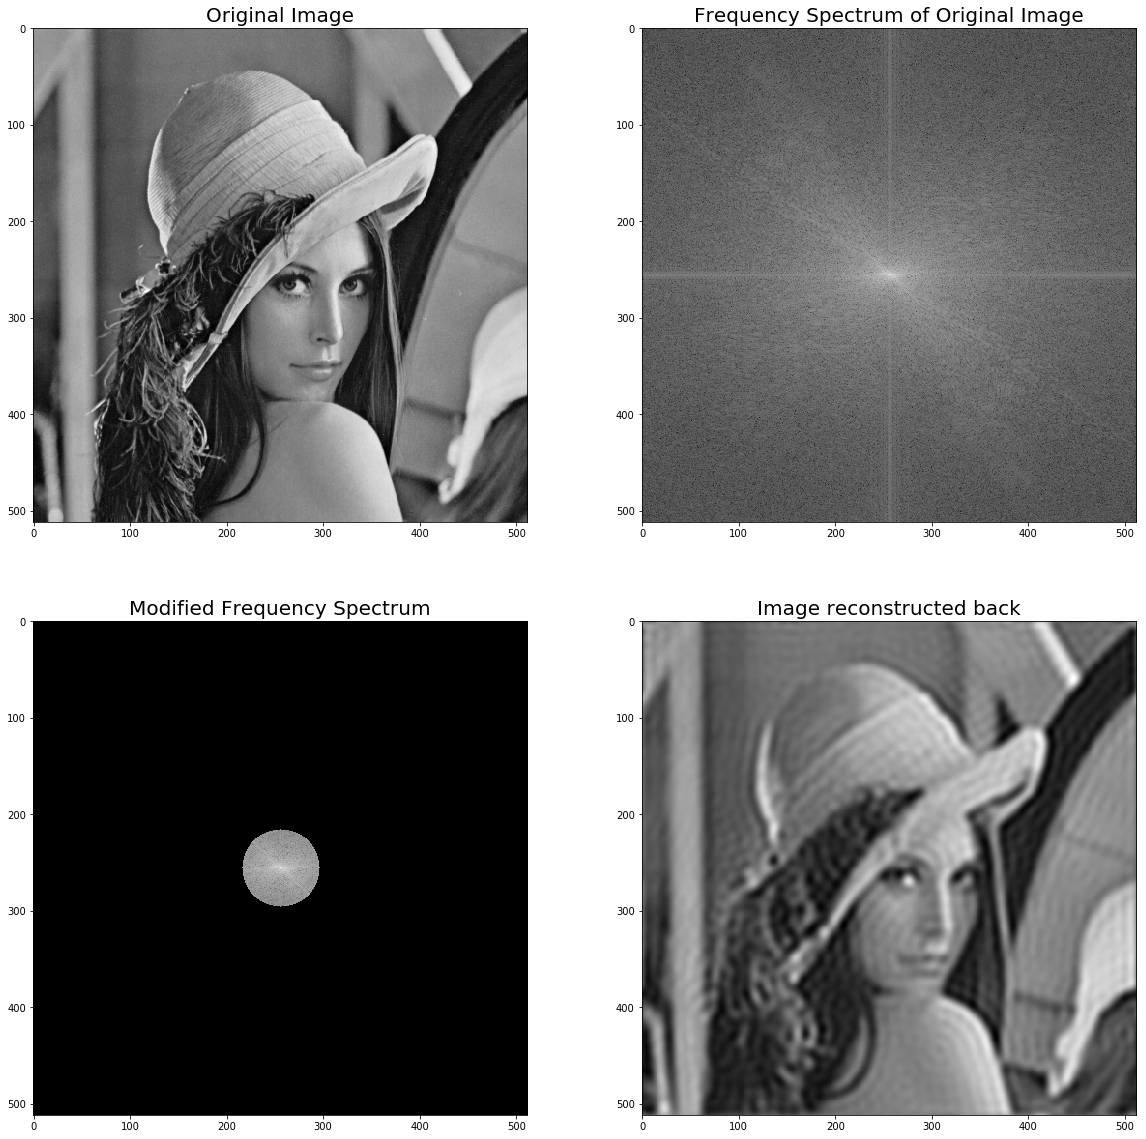

In [3]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 40
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) <= cut_off:
            new_transform[i][j] = fshift[i][j]
        else:
            new_transform[i][j] = 0

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(magnitude_spectrum)
images.append(np.log(1 + np.abs(new_transform)))
images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Frequency Spectrum of Original Image')
subtitles.append('Modified Frequency Spectrum')
subtitles.append('Image reconstructed back')
display_images(images, 2, 2, (20, 20), '', subtitles)

### Butterworth Low Pass Filter

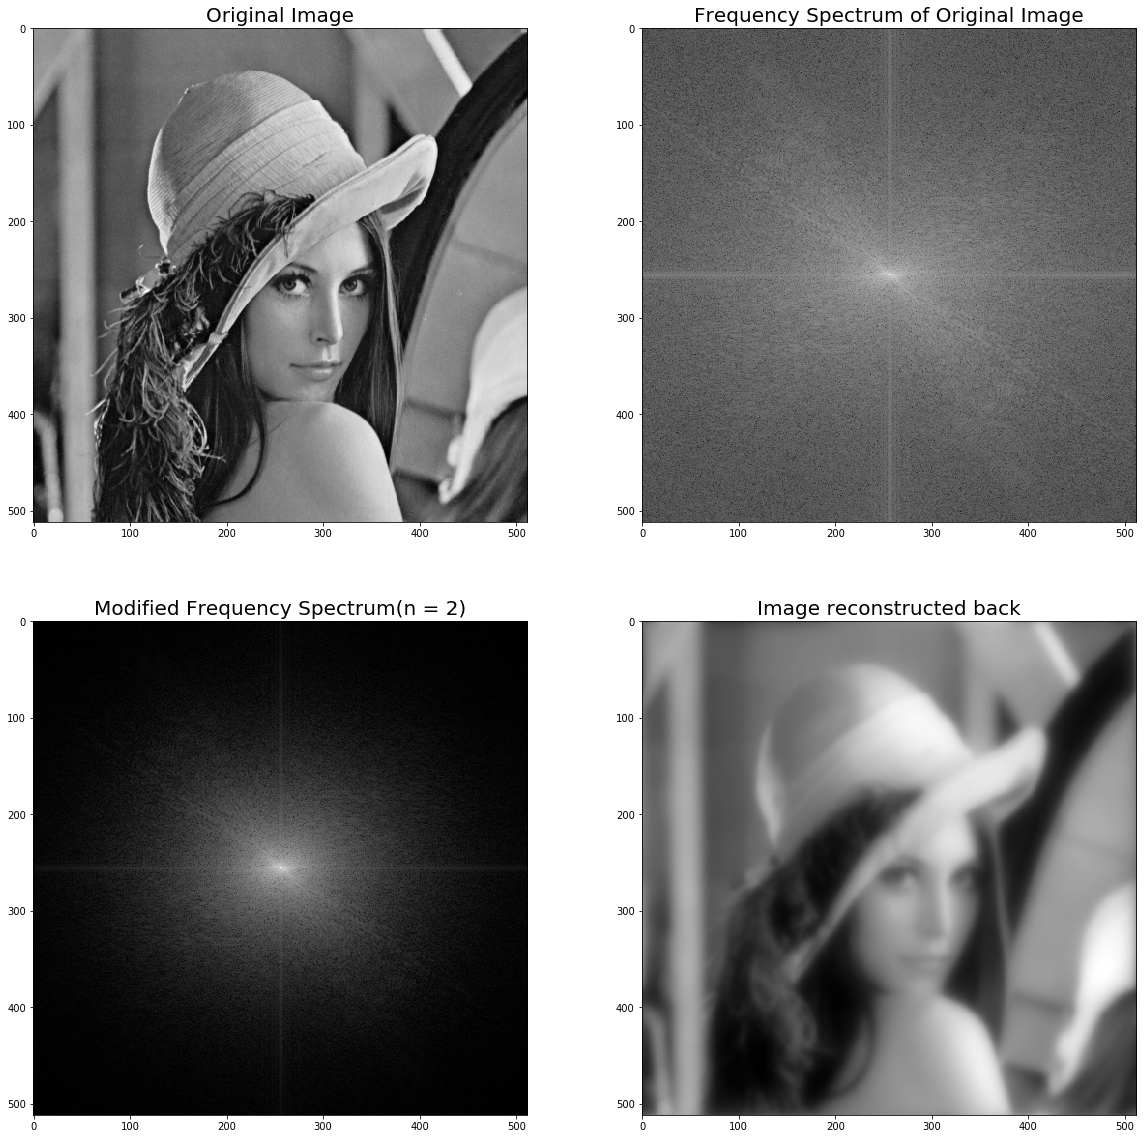

In [4]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 40
n = 2
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = (1 / ((1 + D / cut_off) ** (2 * n))) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(magnitude_spectrum)
images.append(np.log(1 + np.abs(new_transform)))
images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Frequency Spectrum of Original Image')
subtitles.append('Modified Frequency Spectrum(n = 2)')
subtitles.append('Image reconstructed back')
display_images(images, 2, 2, (20, 20), '', subtitles)

### Gaussian Low Pass Filter

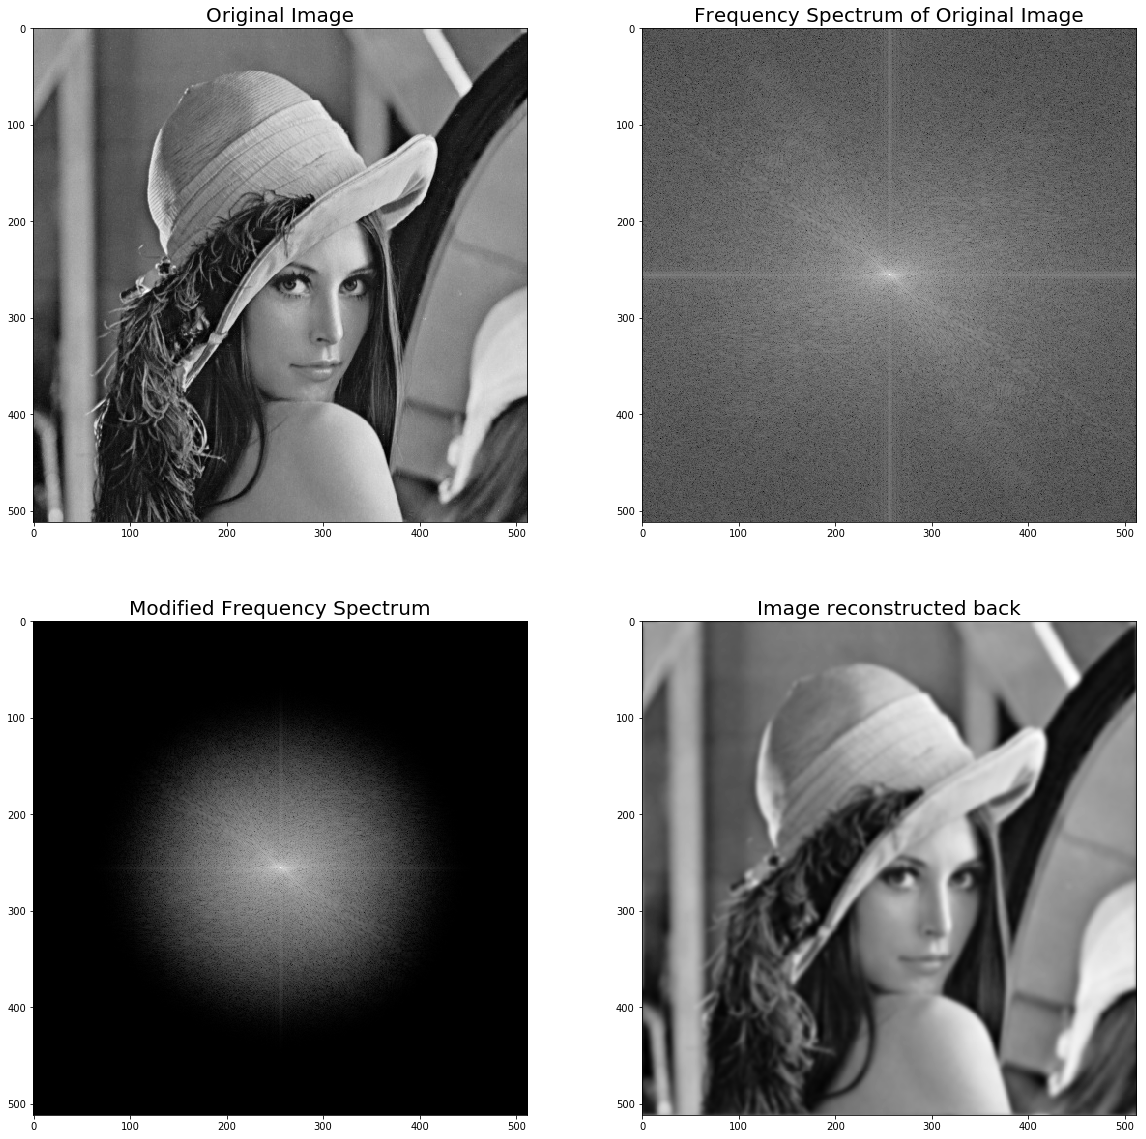

In [5]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 40
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = np.exp(-(D * D) / (2 * cut_off * cut_off)) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(magnitude_spectrum)
images.append(np.log(1 + np.abs(new_transform)))
images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Frequency Spectrum of Original Image')
subtitles.append('Modified Frequency Spectrum')
subtitles.append('Image reconstructed back')
display_images(images, 2, 2, (20, 20), '', subtitles)

# Part 2

In [6]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 20
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = np.exp(-(D * D) / (2 * cut_off * cut_off)) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Cut off = 20')

In [7]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 80
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = np.exp(-(D * D) / (2 * cut_off * cut_off)) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Cut off = 80')

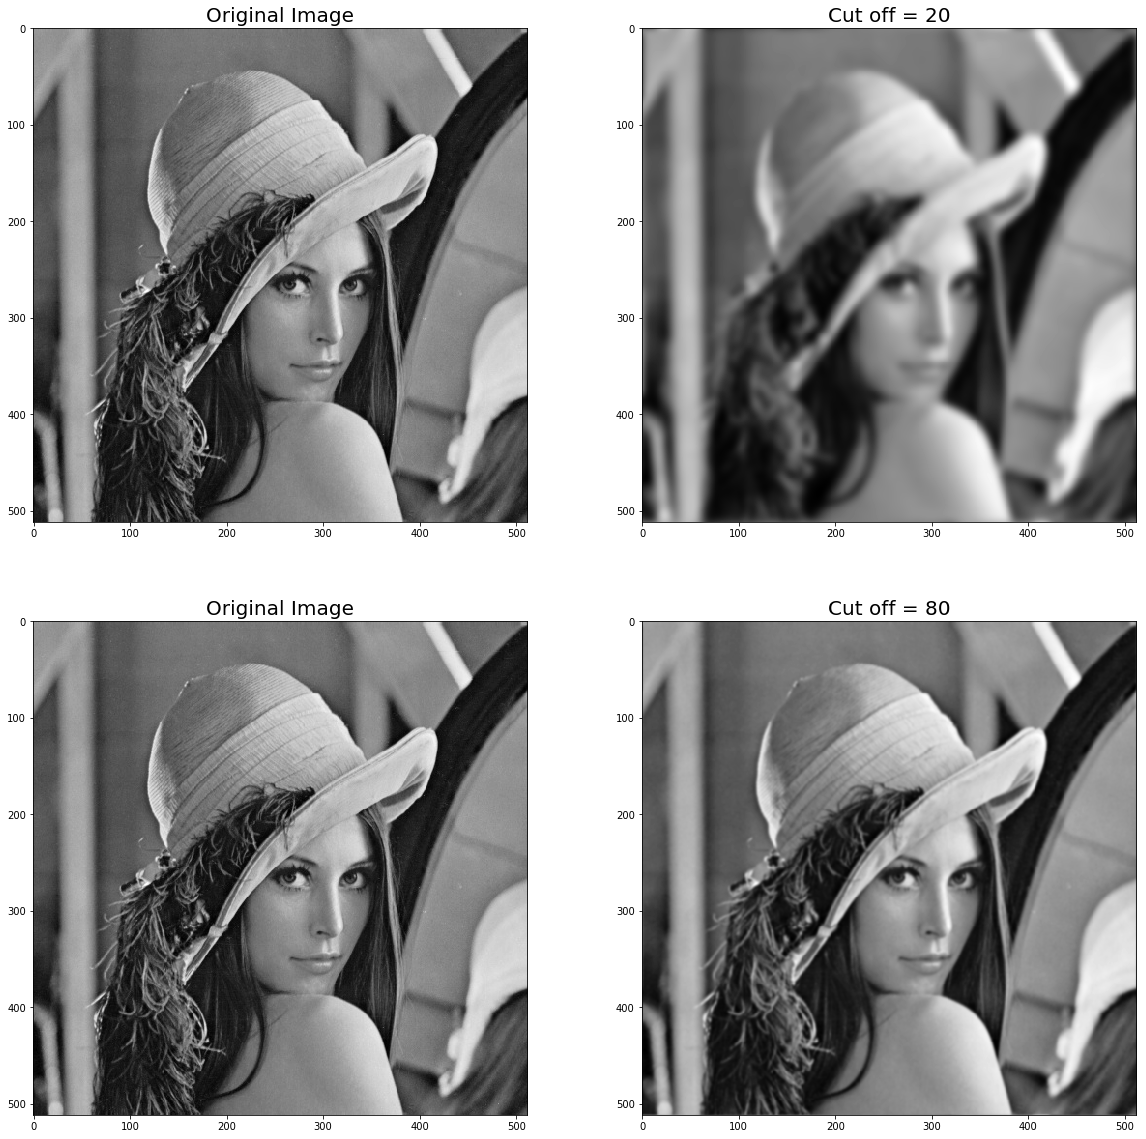

In [8]:
display_images(images, 2, 2, (20, 20), '', subtitles)

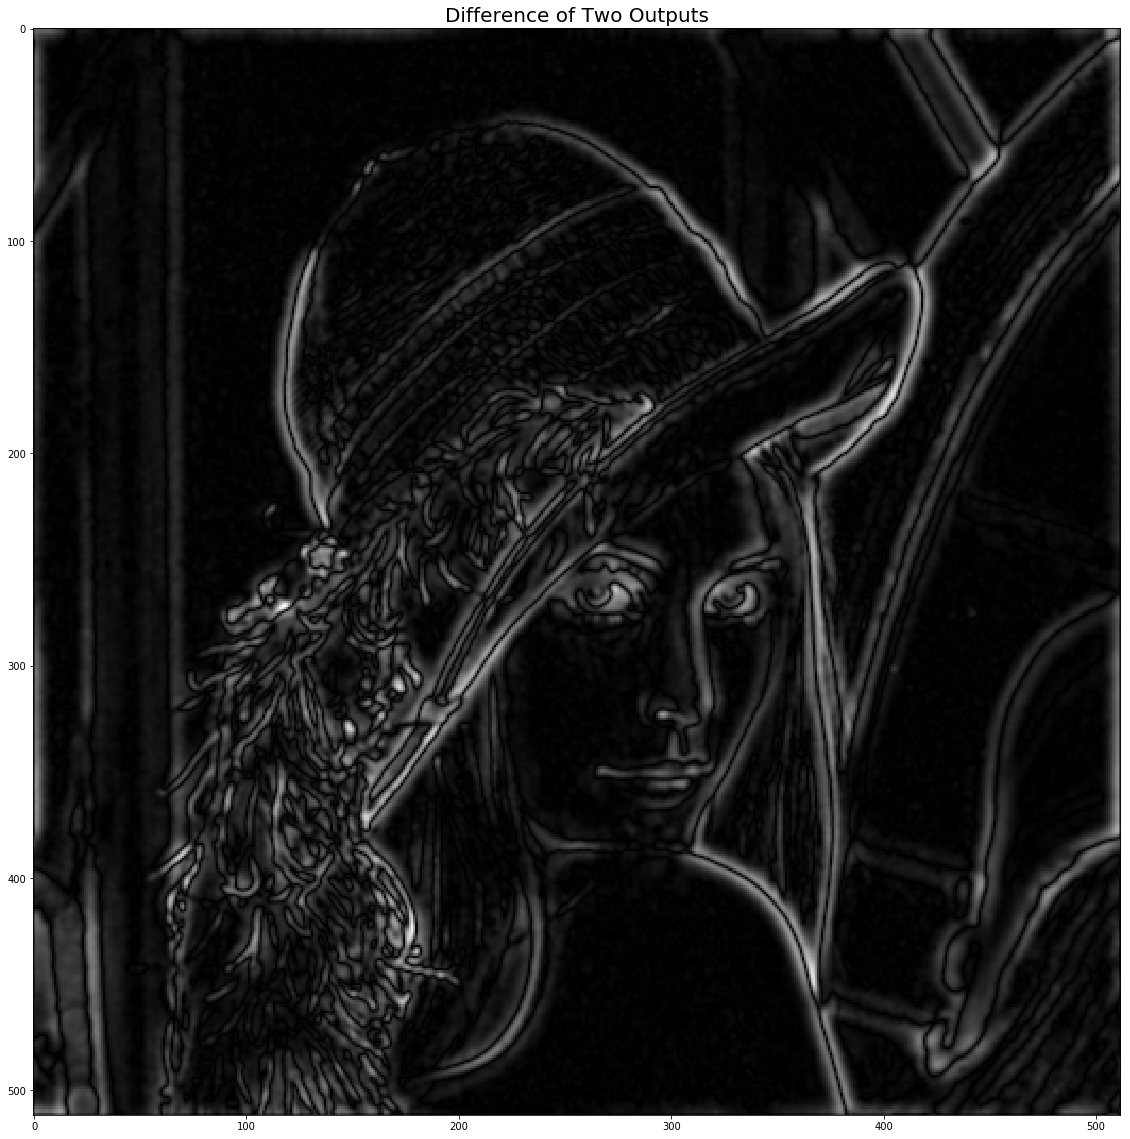

In [9]:
imgs = []
imgs.append(abs(images[1] - images[3]))
subtitles = []
subtitles.append('Difference of Two Outputs')
display_images(imgs, 1, 1, (20, 20), '', subtitles)

In [10]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 150
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = np.exp(-(D * D) / (2 * cut_off * cut_off)) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Cut off = 150')

In [11]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
cut_off = 160
new_transform = np.copy(fshift)
rows = new_transform.shape[0]
cols = new_transform.shape[1]
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
        new_transform[i][j] = np.exp(-(D * D) / (2 * cut_off * cut_off)) * fshift[i][j]

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images.append(img_back)
subtitles.append('Original Image')
subtitles.append('Cut off = 160')

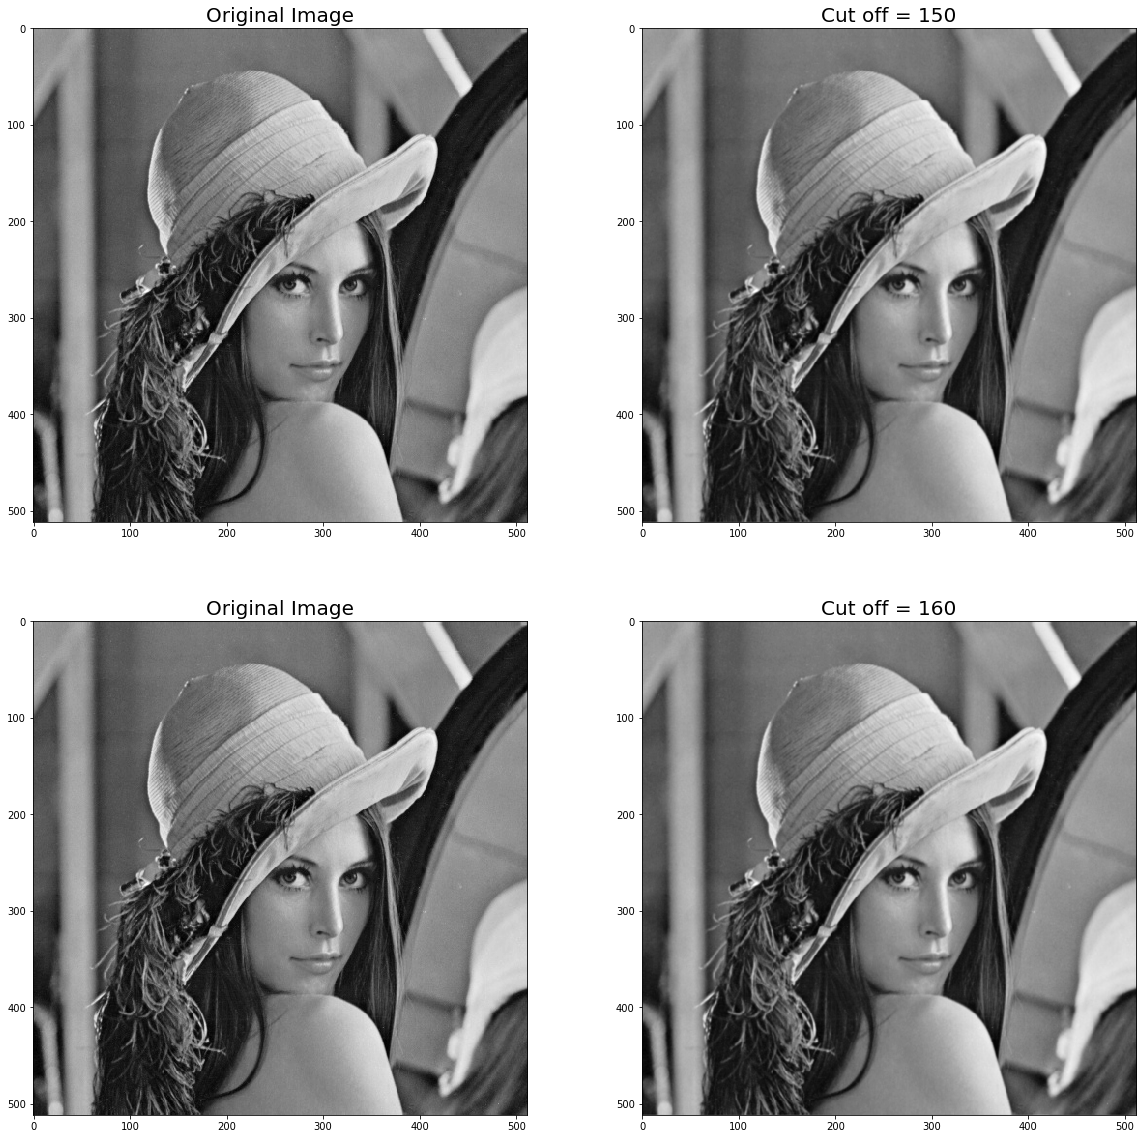

In [12]:
display_images(images, 2, 2, (20, 20), '', subtitles)

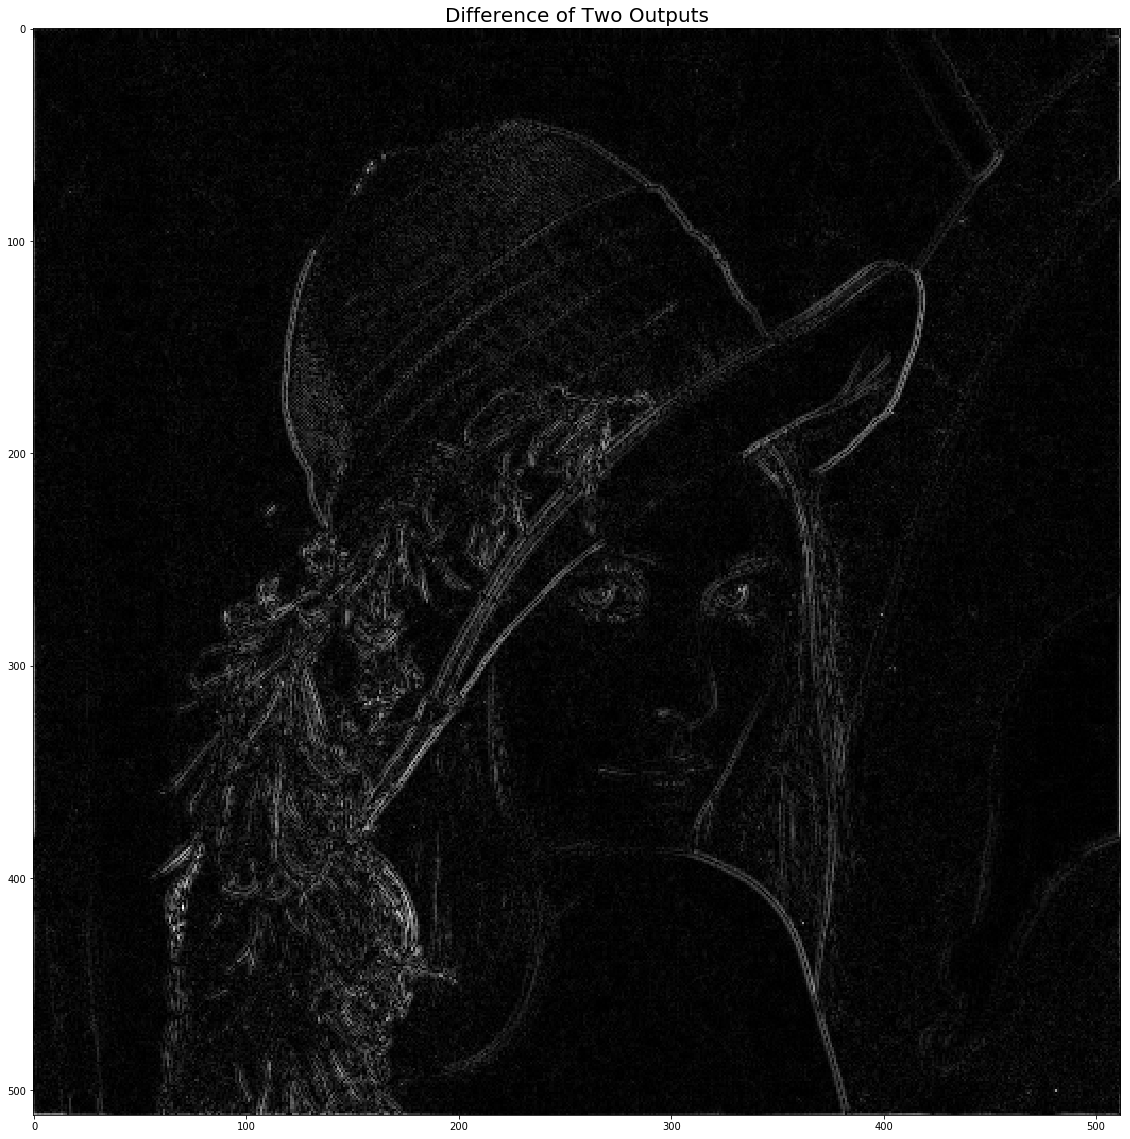

In [13]:
imgs = []
imgs.append(abs(images[1] - images[3]))
subtitles = []
subtitles.append('Difference of Two Outputs')
display_images(imgs, 1, 1, (20, 20), '', subtitles)

<b>Observations</b>
- The difference of two output images results in an image showing the edges of the original image i.e results in an image showing the high pass component.
- The edges become more and more prominent when the minimum of the two sigma values applied is made smaller and smaller, keeping the higher sigma value constant.
- The edges become less and less prominent when the minimum of the two sigma values applied is made larger and larger, keeping the higher sigma value constant.
- The difference of output images depend not only on relative difference between the two sigma values but also on how big and how small they are.
- Applying Gaussian filter is equivalent to getting the low pass components from the image.
- Lower the sigma, lower the frequencies present in that image.
- The above observations are as expected because what we are essentially doing is subtracting a lower pass component from another image which had Gaussian Filter applied with a higher sigma. This results in firing of the high pass components as evident from the above examples. 